# ripe or rotten mango?

In this section, we reload modules for immediate code updates, install required dependencies, while also including custom modules for dataset management, image processing and visualization.

In [1]:
import sys

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # If in Colab, clone the repo and install dependencies
    print("Running in Google Colab...")
    !git -C mangifera pull || git clone https://github.com/dejesusbg/mangifera.git
    %pip install -q -r mangifera/requirements.txt
    sys.path.append('./mangifera/')
    from mangifera.src import get_dataset, preprocess, graphic
else:
    # If running locally (within the repo), set up paths and install dependencies
    print("Running locally...")
    %reload_ext autoreload
    %autoreload 2
    %pip install -q -r ../requirements.txt
    sys.path.append('../')  
    from src import get_dataset, preprocess, graphic

Running locally...
Note: you may need to restart the kernel to use updated packages.


This section imports essential libraries for data manipulation, visualization, and dimensionality reduction.

In [2]:
import warnings
import pandas as pd 

warnings.filterwarnings("ignore")
%matplotlib inline

In this section, we load the dataset, create a DataFrame from the training data, and display its shape along with the first five entries for initial inspection and analysis.

In [3]:
dataset = get_dataset()
train_set = dataset.train_data

train_df = pd.DataFrame(train_set)
print(train_df.shape)
train_df.head(5)

Loaded dataset ../data/raw\train.csv in 0.03 seconds.
Loaded dataset ../data/raw\validation.csv in 0.01 seconds.
(1989, 2)


,filename,label
0,1.jpg,Ripe
1,10.jpg,Ripe
2,1000.jpg,Ripe
3,102.jpg,Ripe
4,103.jpg,Ripe


We initialize the preprocess class with the training dataset to efficiently process and extract features, then organize the processed images into a DataFrame, `features_df`, for subsequent analysis and modeling.

In [4]:
processor = preprocess(train_set)
features_set = processor.data

features_df = pd.DataFrame(features_set)
print(features_df.shape)
features_df.describe()

Loaded dataset ../data/processed\features.csv in 19.74 seconds.
(1989, 263)


,area,mean_r,mean_g,mean_b,std_dev_r,std_dev_g,std_dev_b,hist_0,hist_1,hist_2,...,hist_246,hist_247,hist_248,hist_249,hist_250,hist_251,hist_252,hist_253,hist_254,hist_255
count,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,...,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,6.685059e+04,181.854046,155.196007,126.786020,26.639887,27.660354,36.437425,0.134238,0.245349,0.295626,...,24.937657,29.984917,29.109603,32.245852,37.878331,66.667672,65.017597,106.477124,300.636501,791.275515
std,8.864969e+04,34.294345,38.557030,45.728988,10.555681,10.600771,17.150335,2.321837,3.487710,4.446314,...,173.964051,242.337250,130.992654,165.958609,135.860471,513.428973,375.608281,533.089099,1468.962687,4275.128394
min,1.083000e+03,76.756836,67.474856,14.339593,3.827603,5.637942,7.884951,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.530400e+04,153.235232,130.185822,92.556163,18.003269,20.049799,22.960395,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.800500e+04,177.447050,150.294597,128.293459,26.102443,25.818547,34.824957,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.991000e+04,205.149231,177.272506,150.121064,32.858022,32.503474,45.783679,0.000000,0.000000,0.000000,...,6.000000,6.000000,7.000000,7.000000,6.000000,8.000000,7.000000,6.000000,6.000000,0.000000
max,1.272680e+06,254.209087,253.923098,252.875468,76.380757,104.556292,116.152947,87.000000,136.000000,180.000000,...,4717.000000,7095.000000,3021.000000,5925.000000,2076.000000,16293.000000,14035.000000,14727.000000,36932.000000,39640.000000


This class provides methods for loading and visualizing image data, displaying histograms, analyzing RGB channel statistics, exploring correlations, and performing PCA on image features in a dataset.

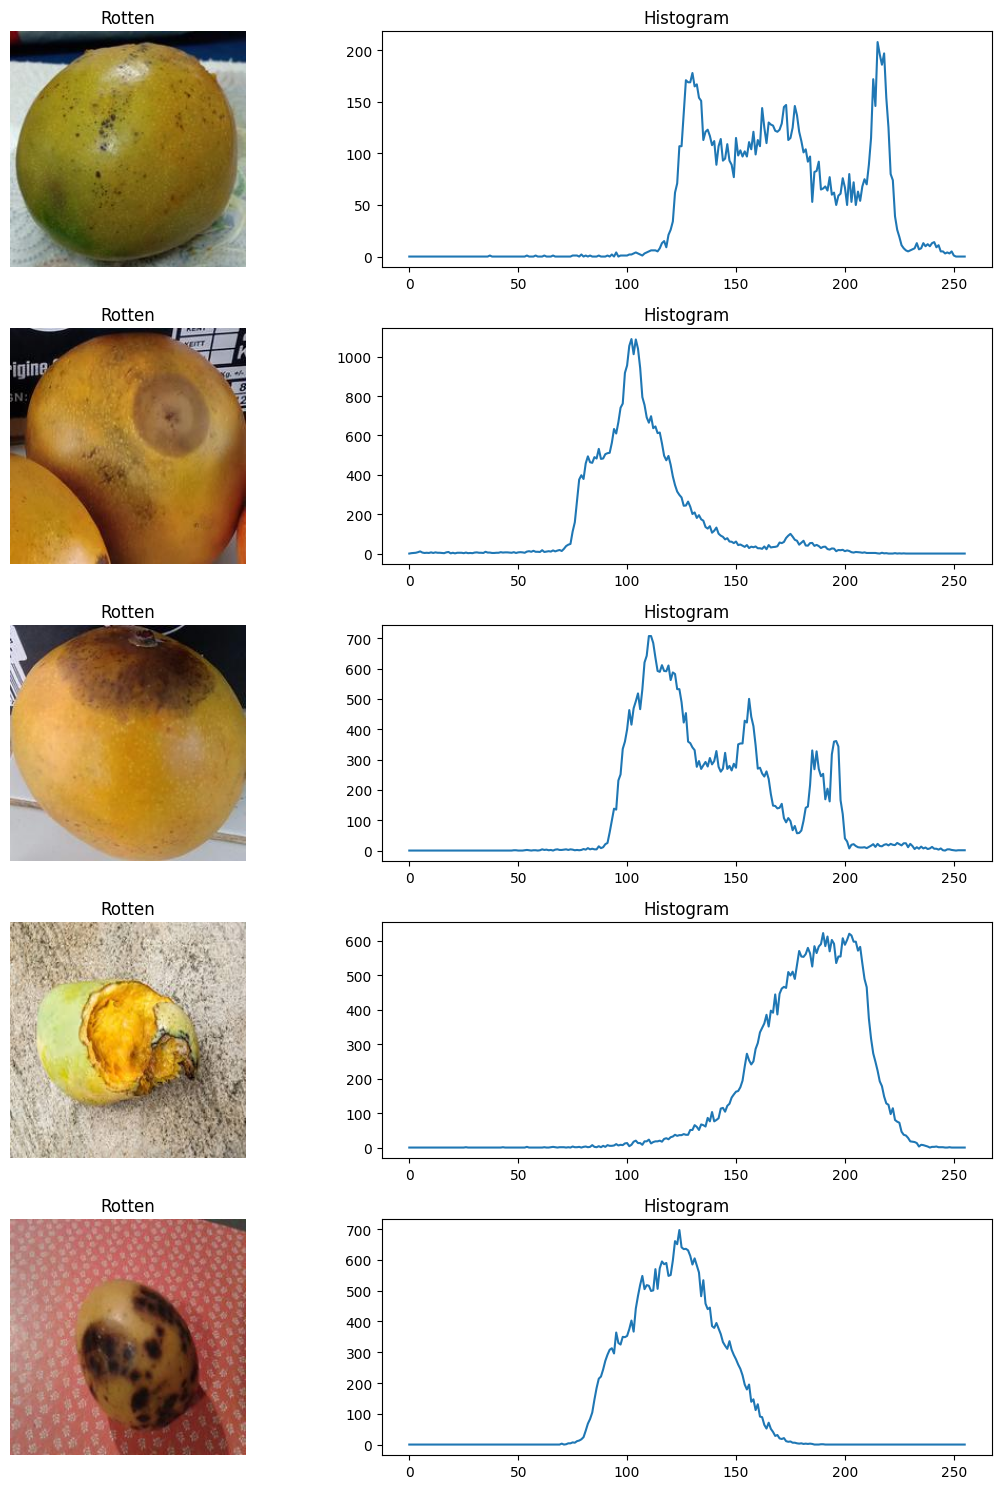

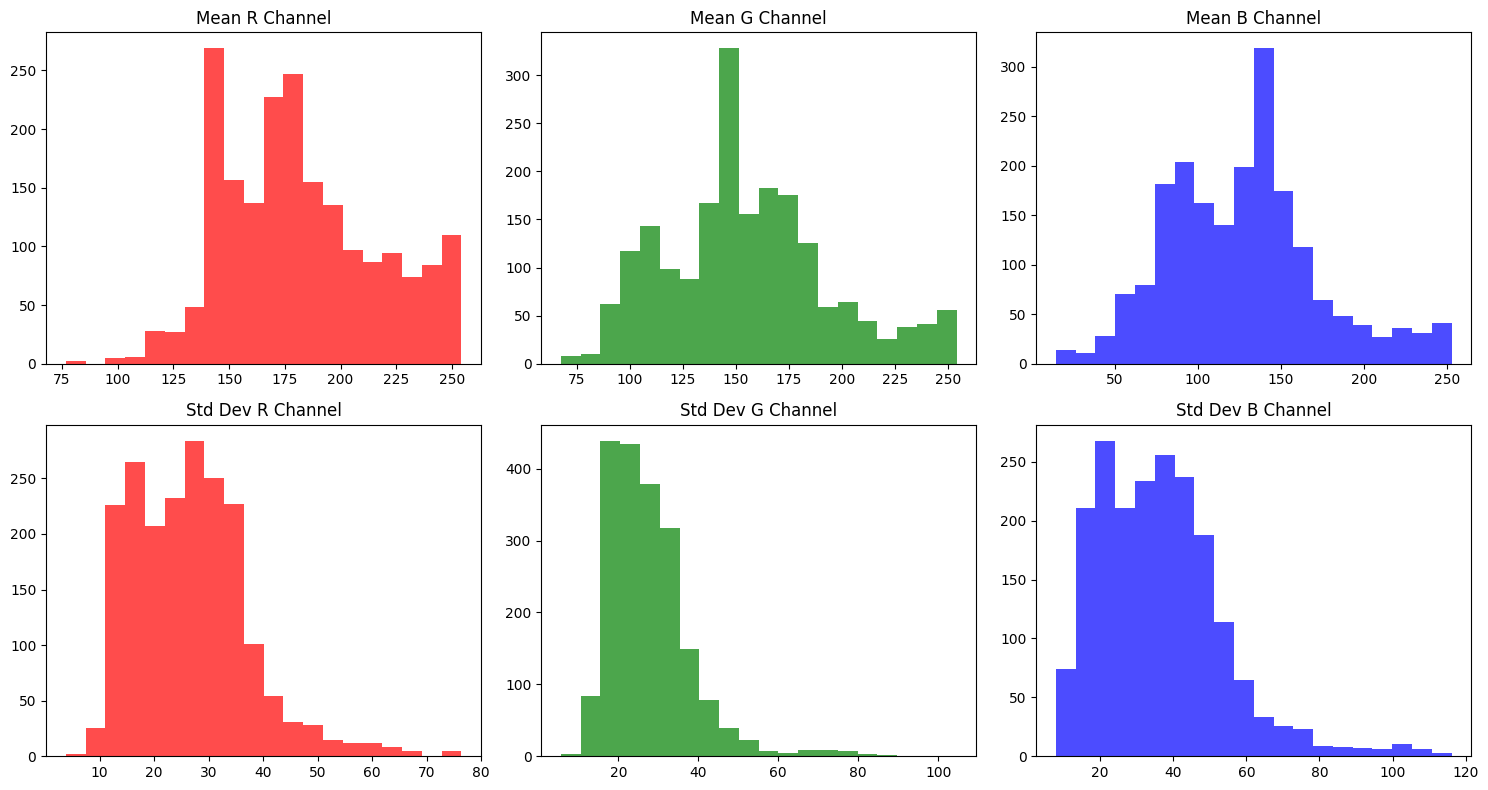

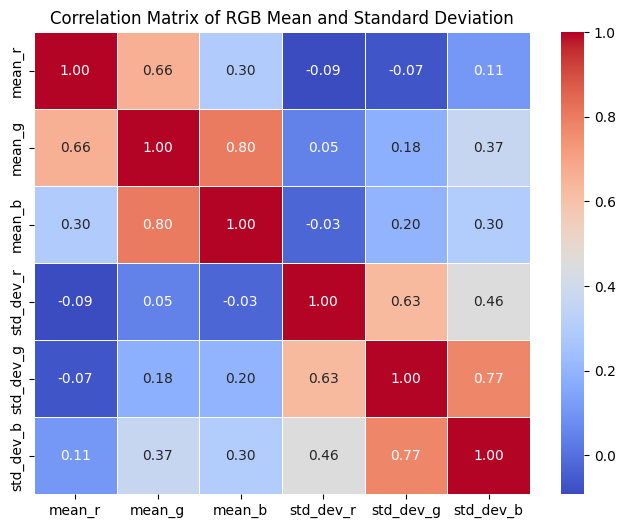

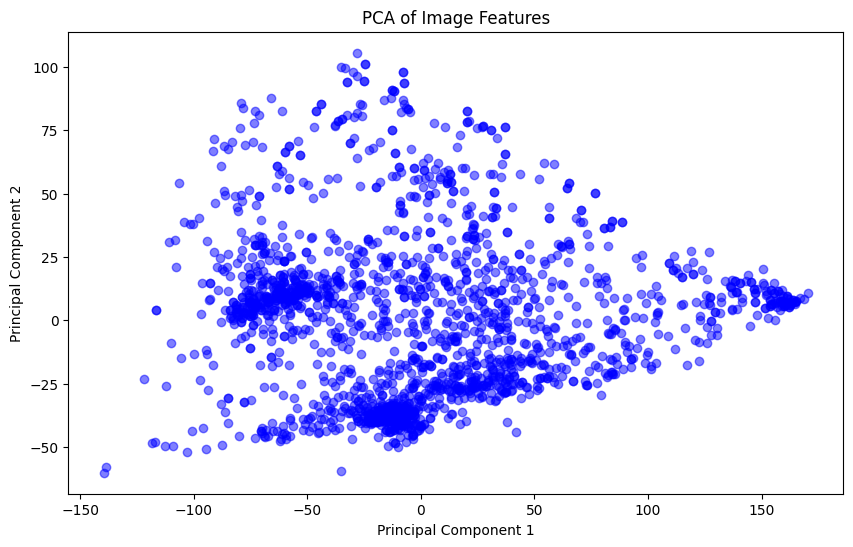

In [5]:
graphic.show_samples(train_set, features_set)

stats_df = features_df[['mean_r', 'mean_g', 'mean_b', 'std_dev_r', 'std_dev_g', 'std_dev_b']]
graphic.show_channels(stats_df)
graphic.show_correlation(stats_df)
graphic.show_pca(stats_df)